# Exemplo 1 - Calcule  y(1) para o Médoto de Runge-Kutta de 4ª ordem para  $y′(x)=−2xy$ com a condição inicial  $y(0)=3$.

valor de y_numerico(1) =  1.104095458984375
valor de y_analitico(1) =  1.103638323514327


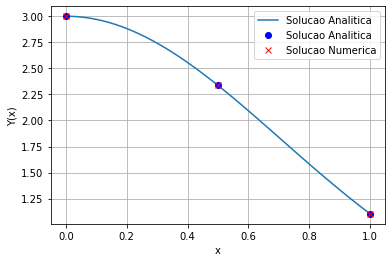

erro percentual em y(1) com 2 passos: 0.041421%


In [ ]:
# runge-kutta 4ª ordem
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3*np.exp(-x*x)   

def df(x,y):
  return -2*x*y

x_0 = 0
x_f = 1
y_0 = 3
n_pontos = 3             # modifique aqui para gerar exemplos de passos de tamanhos diferentes
passo = n_pontos - 1
h = (x_f - x_0)/passo   # passo de acordo com o numero de pontos
x = np.zeros((n_pontos))     # vetor com as posições de x
y_rk = np.zeros((n_pontos))     # vetor com as solucoes numericas
y_ = np.zeros((n_pontos))     # vetor com as soluções analiticas (para o grafico)
x[0] = x_0
y_rk[0] = y_0
y_[0] = y_0
for j in range(0,n_pontos-1):
  K1 = df(x[j],y_rk[j]) # Euler Simples
  K2 = df(x[j]+h/2.,y_rk[j] + (h/2.)*K1) #Euler Modificado
  K3 = df(x[j]+h/2.,y_rk[j] + (h/2.)*K2)
  K4 = df(x[j]+h,y_rk[j] + h*K3) 
  y_rk[j+1] = y_rk[j] + (h/6.)*(K1 + 2.*K2 + 2.*K3 + K4)  # runge-kutta tem mais suavidade
  x[j+1] = x[j] + h # estimar próximo ponto
  y_[j+1] = f(x[j+1]) # função analítica

print("valor de y_numerico(1) = ",y_rk[-1])
print("valor de y_analitico(1) = ",y_[-1])

# imprimindo solucao para os diferentes passos
x_ = np.linspace(x[0],x[n_pontos-1]) #limites no eixo x
plt.plot(x_,f(x_),x,y_,'ob',x,y_rk,'xr') 
plt.legend(['Solucao Analitica','Solucao Analitica','Solucao Numerica'])
plt.xlabel('x') 
plt.ylabel('Y(x)') 
plt.grid()
plt.show()
print('erro percentual em y({:}) com {:} passos: {:2.6%}'.format(x_f,n_pontos-1,np.fabs((y_[n_pontos-1] - y_rk[n_pontos-1])/y_[n_pontos-1])))

# Exemplo 2: compare os métodos de Euler Simples, Euler Modificado e Runge-Kutta 4ª ordem para o exemplo 1.

*   Repita os testes do exemplo 1 neste exemplo.

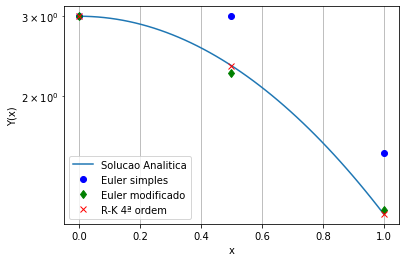

erro percentual em y(1) com 2 passos: 
-> Euler simples = 35.914091%   
-> Euler modificado = 1.935569%   
-> R-K 4ª ordem = 0.041421%


In [ ]:
# tres metodos: eule simples, euler modificado e runge-kutta 4ª ordem
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3*np.exp(-x*x)   

def df(x,y):
  return -2*x*y

x_0 = 0
x_f = 1
y_0 = 3
n_pontos = 3            # modifique aqui para gerar exemplos de passos de tamanhos diferentes
h = (x_f - x_0)/(n_pontos-1)   # passo de acordo com o numero de pontos
x = np.zeros((n_pontos))     # vetor com as posições de x
y_euler = np.zeros((n_pontos))     # vetor com as solucoes numericas
y_mod = np.zeros((n_pontos))     # vetor com as solucoes numericas
y_rk = np.zeros((n_pontos))     # vetor com as solucoes numericas
y_ = np.zeros((n_pontos))     # vetor com as soluções analiticas (para o grafico)
x[0] = x_0
y_euler[0] = y_0
y_mod[0] = y_0
y_rk[0] = y_0
y_[0] = y_0
for j in range(0,n_pontos-1):
  K1 = df(x[j],y_rk[j])
  K2 = df(x[j]+h/2.,y_rk[j] + (h/2.)*K1)
  K3 = df(x[j]+h/2.,y_rk[j] + (h/2.)*K2)
  K4 = df(x[j]+h,y_rk[j] + h*K3)
  y_euler[j+1] = y_euler[j] + h*df(x[j],y_euler[j]) # euler simples
  y_aux = y_mod[j] + h*df(x[j],y_mod[j])
  y_mod[j+1] = y_mod[j] + (h/2)*(df(x[j],y_mod[j]) + df(x[j]+h,y_aux))  # euler modificado
  y_rk[j+1] = y_rk[j] + (h/6.)*(K1 + 2.*K2 + 2.*K3 + K4)  # runge-kutta
  x[j+1] = x[j] + h
  y_[j+1] = f(x[j+1])


#erros relativo em y(x_f)
erro_euler = np.fabs((y_[n_pontos-1] - y_euler[n_pontos-1])/y_[n_pontos-1])
erro_mod = np.fabs((y_[n_pontos-1] - y_mod[n_pontos-1])/y_[n_pontos-1])
erro_rk = np.fabs((y_[n_pontos-1] - y_rk[n_pontos-1])/y_[n_pontos-1])

# imprimindo solucao para os diferentes passos
x_ = np.linspace(x[0],x[n_pontos-1]) #limites no eixo x
plt.plot(x_,f(x_),x,y_euler,'ob',x,y_mod,'dg',x,y_rk,'xr') 
plt.legend(['Solucao Analitica','Euler simples','Euler modificado','R-K 4ª ordem'])
plt.yscale('log')
plt.xlabel('x') 
plt.ylabel('Y(x)') 
plt.grid()
plt.show()
print('erro percentual em y({:}) com {:} passos: \n-> Euler simples = {:2.6%}   \n-> Euler modificado = {:2.6%}   \n-> R-K 4ª ordem = {:2.6%}'.format(x_f,n_pontos-1,erro_euler,erro_mod,erro_rk))

#Exemplo 3 - Seja $y′(x)= yln(x)$ , para a condição inicial $y(1)=1$, calcule $y(6)$. Compare os resultados para os  três métodos: Euler simples, Euler modificado e Runge-Kutta 4ª ordem.

Calcule y(6) para o PVI $y’= y*ln(x)$ com y(1) = 1  com sete passos, para os três métodos. Estime o erro relativo sabendo que a solução analítica deste problema é $𝑦(𝑥)=𝑒^{1−𝑥} 𝑥^𝑥$.

valor de y_numerico(euler simples) =  36.89372832123132
valor de y_numerico(euler modificado) =  187.50291068469437
valor de y_numerico(RK ordem 4) =  307.10007666314505
valor de y_analitico(1) =  314.3656551893321


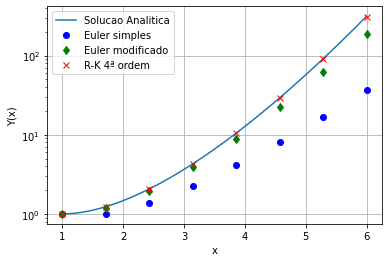

erro percentual em y(6) com 7 passos: 
-> Euler simples = 88.264072%   
-> Euler modificado = 40.355154%   
-> R-K 4ª ordem = 2.311187%


In [ ]:
# tres metodos: eule simples, euler modificado e runge-kutta 4ª ordem
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(1-x)*np.power(x, x)   

def df(x,y):
  return y*np.log(x)

x_0 = 1
x_f = 6
y_0 = 1
n_pontos = 8             # modifique aqui para gerar exemplos de passos de tamanhos diferentes
passos = n_pontos - 1
h = (x_f - x_0)/passos   # passo de acordo com o numero de pontos
x = np.zeros((n_pontos))     # vetor com as posições de x
y_euler = np.zeros((n_pontos))     # vetor com as solucoes numericas
y_mod = np.zeros((n_pontos))     # vetor com as solucoes numericas
y_rk = np.zeros((n_pontos))     # vetor com as solucoes numericas
y_ = np.zeros((n_pontos))     # vetor com as soluções analiticas (para o grafico)
x[0] = x_0
y_euler[0] = y_0
y_mod[0] = y_0
y_rk[0] = y_0
y_[0] = y_0
for j in range(0,n_pontos-1):
  K1 = df(x[j],y_rk[j])
  K2 = df(x[j]+h/2.,y_rk[j] + (h/2.)*K1)
  K3 = df(x[j]+h/2.,y_rk[j] + (h/2.)*K2)
  K4 = df(x[j]+h,y_rk[j] + h*K3)
  y_euler[j+1] = y_euler[j] + h*df(x[j],y_euler[j]) # euler simples
  y_aux = y_mod[j] + h*df(x[j],y_mod[j])
  y_mod[j+1] = y_mod[j] + (h/2)*(df(x[j],y_mod[j]) + df(x[j]+h,y_aux))  # euler modificado
  y_rk[j+1] = y_rk[j] + (h/6.)*(K1 + 2.*K2 + 2.*K3 + K4)  # runge-kutta
  x[j+1] = x[j] + h
  y_[j+1] = f(x[j+1])

print("valor de y_numerico(euler simples) = ",y_euler[-1])
print("valor de y_numerico(euler modificado) = ",y_mod[-1])
print("valor de y_numerico(RK ordem 4) = ",y_rk[-1])
print("valor de y_analitico(1) = ",y_[-1])

#erros relativo em y(x_f)
erro_euler = np.fabs((y_[n_pontos-1] - y_euler[n_pontos-1])/y_[n_pontos-1])
erro_mod = np.fabs((y_[n_pontos-1] - y_mod[n_pontos-1])/y_[n_pontos-1])
erro_rk = np.fabs((y_[n_pontos-1] - y_rk[n_pontos-1])/y_[n_pontos-1])

# imprimindo solucao para os diferentes passos
x_ = np.linspace(x[0],x[n_pontos-1]) #limites no eixo x
plt.plot(x_,f(x_),x,y_euler,'ob',x,y_mod,'dg',x,y_rk,'xr') 
plt.legend(['Solucao Analitica','Euler simples','Euler modificado','R-K 4ª ordem'])
plt.xlabel('x') 
plt.yscale('log')
plt.ylabel('Y(x)') 
plt.grid()
plt.show()
print('erro percentual em y({:}) com {:} passos: \n-> Euler simples = {:2.6%}   \n-> Euler modificado = {:2.6%}   \n-> R-K 4ª ordem = {:2.6%}'.format(x_f,n_pontos-1,erro_euler,erro_mod,erro_rk))

# Exemplo 4: Calcule $y(8)$ para  $y'' + y = 0$, com condições iniciais $y(0) = -5$ e $y'(0) = 0$  com 100 passos, para os três métodos numericos estudados. Teste variar o nº de passos. A solução analítica desta EDO é $y(x) = -5cos(x)$.

A EDO de 2ª ordem $y'' + y = 0$ pode ser redefinida como:

$y_1 = y$ e $y'_1 = y_2 \rightarrow y'_2 + y_1 = 0 \rightarrow y'_2 = -y1$. Assim torna-se o sistema:

 $\left\{
\begin{aligned}
    y'_1     &= y_2\\
    y'_2 &= -y_1
\end{aligned}
\right.$ com condições iniciais $y_1(0) = -5$ e $y_2(0) = 0$.


Para o método de Euler simples teremos:

$\left[ 
  \begin{array}{c}
  y_1{(k+1)} \\
  y_2{(k+1)}
  \end{array}
 \right] = \left[ 
  \begin{array}{c}
  y_1{(k)} \\
  y_2{(k)}
  \end{array}
 \right] +h
 \left[ 
  \begin{array}{c}
  y'_1{(k)} \\
  y'_2{(k)}
  \end{array}
 \right]$ 
 
 ou na forma vetorial: 
 
 $\mathbf{y}(k+1) =  \mathbf{y}(k) + h\mathbf{y'}(k)$, onde $\mathbf{y'}(k) = \mathbf{y'}(x(k),\mathbf{y}(k))$, para $k=0,...,n-1$.

Para o método de Euler modificado teremos:

$\mathbf{\bar{y}}(k+1) = \mathbf{y}(k) + h\mathbf{y'}(k)$

$ \mathbf{y}(k+1) =  \mathbf{y}(k) + h\mathbf{f}(x(k) + h,\mathbf{\bar{y}}(k+1))$

Para o método de Runge-Kutta de 4ªordem teremos:

$\mathbf{K_1} = \mathbf{y'}(x(k),\mathbf{y}(k))$

$\mathbf{K_2} = \mathbf{y'}(x(k)+\frac{h}{2},\mathbf{y}(k) + \frac{h}{2}\mathbf{K_1})$

$\mathbf{K_3} = \mathbf{y'}(x(k)+\frac{h}{2},\mathbf{y}(k) + \frac{h}{2}\mathbf{K_2})$

$\mathbf{K_4} = \mathbf{y'}(x(k)+h,\mathbf{y}(k) + h\mathbf{K_3})$

$ \mathbf{y}(k+1) =  \mathbf{y}(k) + \frac{h}{6}(\mathbf{K_1} + 2\mathbf{K_2} + 2\mathbf{K_3} + \mathbf{K_4})$

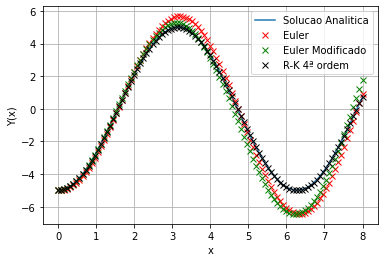

erro percentual em y(8.0) com 100 passos:
-> Euler simples = 21.649278%
-> Euler modificado = 141.652632%
-> R-K 4ª ordem = 0.001871%


In [ ]:
# Todos os metodos: euler simples + euler modificado + R-K 4ª ordem
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return -5*np.cos(x)  

def df(y1,y2):
  resp = np.zeros((2))
  resp[0] = y2 
  resp[1] = -y1
  return resp

x_i = 0.
x_f = 8.
y_0 = [-5., 0.]
n_pontos = 101   # modifique aqui para gerar exemplos de passos de tamanhos diferentes
h = (x_f - x_i)/(n_pontos-1)   # passo de acordo com o numero de pontos
x = np.zeros((n_pontos))     # vetor com as posições de x
y_euler = np.zeros((n_pontos,2))     # vetor com as solucoes numericas pelo metodo de euler
y_euler_mod = np.zeros((n_pontos,2))     # vetor com as solucoes numericas pelo metodo de euler modficado
y_rk = np.zeros((n_pontos,2))     # vetor com as solucoes numericas pelo metodo de runge-kutta de 4ªordem
y_ = np.zeros((n_pontos))     # vetor com as soluções analiticas (para o grafico)
K1 = np.zeros((2))
K2 = np.zeros((2))
K3 = np.zeros((2))
K4 = np.zeros((2))
x[0] = x_i      
y_euler[0,:] = y_0 
y_euler_mod[0,:] = y_0
y_rk[0,:] = y_0
y_[0] = y_0[0]



for j in range(0,n_pontos-1):
  # euler simples
  y_euler[j+1,:] = y_euler[j,:] + np.multiply(h,df(y_euler[j,0],y_euler[j,1]))

  # euler modificado
  y_euler_mod[j+1,:] = y_euler_mod[j,:] + np.multiply(h/2.,df(y_euler_mod[j,0],y_euler_mod[j,1]) + df(y_euler[j+1,0],y_euler[j+1,1]))

  # runge-kutta
  K1 = df(y_rk[j,0],y_rk[j,1])
  K2 = df(y_rk[j,0] + (h/2.)*K1[0],y_rk[j,1] + (h/2.)*K1[1])
  K3 = df(y_rk[j,0] + (h/2.)*K2[0],y_rk[j,1] + (h/2.)*K2[1])
  K4 = df(y_rk[j,0] + h*K3[0],y_rk[j,1] + h*K3[1])
  y_rk[j+1] = y_rk[j] + np.multiply(h/6.,K1 + np.multiply(2.,K2 + K3) + K4)

  
  x[j+1] = x[j] + h
  y_[j+1] = f(x[j+1])


#erros relativo em y(x_f)
err_euler = np.fabs((y_[n_pontos-1] - y_euler[n_pontos-1,0])/y_[n_pontos-1])
err_euler_mod = np.fabs((y_[n_pontos-1] - y_euler_mod[n_pontos-1,0])/y_[n_pontos-1])
err_rk = np.fabs((y_[n_pontos-1] - y_rk[n_pontos-1,0])/y_[n_pontos-1])

# imprimindo solucao para os diferentes passos
x_ = np.linspace(x[0],x[n_pontos-1]) #limites no eixo x
plt.plot(x_,f(x_),x,y_euler[:,0],'xr',x,y_euler_mod[:,0],'xg',x,y_rk[:,0],'xk') 
plt.legend(['Solucao Analitica','Euler','Euler Modificado','R-K 4ª ordem'])
plt.xlabel('x') 
plt.ylabel('Y(x)') 
plt.grid()
plt.show()
print('erro percentual em y({:}) com {:} passos:\n-> Euler simples = {:2.6%}\n-> Euler modificado = {:2.6%}\n-> R-K 4ª ordem = {:2.6%}'.format(x_f,n_pontos-1,err_euler,err_euler_mod,err_rk))

# Exemplo 5: Calcule $y(5)$ para  $y'' - 2y'+ y  + x  = 0$, com condições iniciais $y(1) = -3$ e $y'(1) = 1$, com 20 passos, para os três métodos numericos estudados. Teste variar o nº de passos. A solução analítica desta EDO é $y(x) = 2(x-1)e^{x-1} - x - 2$.

A EDO de 2ª ordem $y'' -2y' + y + x = 0$ pode ser redefinida como:

$y_1 = y$ e $y'_1 = y_2 \rightarrow y'_2 -2y_2 + y_1 + x = 0 \rightarrow y'_2 = 2y_2 - y_1 - x$. Assim torna-se o sistema:

 $\left\{
\begin{aligned}
    y'_1     &= y_2\\
    y'_2 &= 2y_2 - y_1 - x
\end{aligned}
\right.$ com condições iniciais $y_1(1) = -3$ e $y_2(1) = 1$.

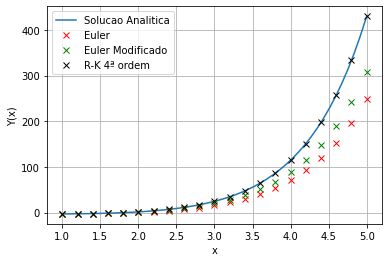

erro percentual em y(5.0) com 20 passos:
-> Euler simples = 42.160875%
-> Euler modificado = 28.463774%
-> R-K 4ª ordem = 0.010137%


In [ ]:
# Todos os metodos: euler simples + euler modificado + R-K 4ª ordem
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2*(x-1)*np.exp(x-1) - x - 2.  

def df(y1,y2,x):
  resp = np.zeros((2))
  resp[0] = y2 
  resp[1] = 2.*y2 - y1 - x
  return resp

x_i = 1.
x_f = 5.
y_0 = [-3., 1.]
n_pontos = 21   # modifique aqui para gerar exemplos de passos de tamanhos diferentes
h = (x_f - x_i)/(n_pontos-1)   # passo de acordo com o numero de pontos
x = np.zeros((n_pontos))     # vetor com as posições de x
y_euler = np.zeros((n_pontos,2))     # vetor com as solucoes numericas pelo metodo de euler
y_euler_mod = np.zeros((n_pontos,2))     # vetor com as solucoes numericas pelo metodo de euler modficado
y_rk = np.zeros((n_pontos,2))     # vetor com as solucoes numericas pelo metodo de runge-kutta de 4ªordem
y_ = np.zeros((n_pontos))     # vetor com as soluções analiticas (para o grafico)
K1 = np.zeros((2))
K2 = np.zeros((2))
K3 = np.zeros((2))
K4 = np.zeros((2))
x[0] = x_i      
y_euler[0,:] = y_0 
y_euler_mod[0,:] = y_0
y_rk[0,:] = y_0
y_[0] = y_0[0]


for j in range(0,n_pontos-1):
  # euler
  y_euler[j+1,:] = y_euler[j,:] + np.multiply(h,df(y_euler[j,0],y_euler[j,1],x[j]))

  # euler modificado
  y_euler_mod[j+1,:] = y_euler_mod[j,:] + np.multiply(h/2.,df(y_euler_mod[j,0],y_euler_mod[j,1],x[j]) + df(y_euler[j+1,0],y_euler[j+1,1],x[j]+h))

  # runge-kutta
  K1 = df(y_rk[j,0],y_rk[j,1],x[j])
  K2 = df(y_rk[j,0] + (h/2.)*K1[0],y_rk[j,1] + (h/2.)*K1[1],x[j]+h/2.)
  K3 = df(y_rk[j,0] + (h/2.)*K2[0],y_rk[j,1] + (h/2.)*K2[1],x[j]+h/2.)
  K4 = df(y_rk[j,0] + h*K3[0],y_rk[j,1] + h*K3[1],x[j]+h)
  y_rk[j+1] = y_rk[j] + np.multiply(h/6.,K1 + np.multiply(2.,K2 + K3) + K4)


  x[j+1] = x[j] + h
  y_[j+1] = f(x[j+1])

#erros relativo em y(x_f)
err_euler = np.fabs((y_[n_pontos-1] - y_euler[n_pontos-1,0])/y_[n_pontos-1])
err_euler_mod = np.fabs((y_[n_pontos-1] - y_euler_mod[n_pontos-1,0])/y_[n_pontos-1])
err_rk = np.fabs((y_[n_pontos-1] - y_rk[n_pontos-1,0])/y_[n_pontos-1])

# imprimindo solucao para os diferentes passos
x_ = np.linspace(x[0],x[n_pontos-1]) #limites no eixo x
plt.plot(x_,f(x_),x,y_euler[:,0],'xr',x,y_euler_mod[:,0],'xg',x,y_rk[:,0],'xk') 
plt.legend(['Solucao Analitica','Euler','Euler Modificado','R-K 4ª ordem'])
plt.xlabel('x') 
plt.ylabel('Y(x)') 
plt.grid()
plt.show()
print('erro percentual em y({:}) com {:} passos:\n-> Euler simples = {:2.6%}\n-> Euler modificado = {:2.6%}\n-> R-K 4ª ordem = {:2.6%}'.format(x_f,n_pontos-1,err_euler,err_euler_mod,err_rk))